In [24]:
# 匯入套件
from gensim.models import Word2Vec
import jieba

In [25]:
documents = []
with open("./cases/bert_finetune/reviews.txt", "r", encoding="utf-8") as file:
    for line in file:
        document = line.split("\t")[0]
        documents.append(document.replace('"', ''))

docs = [jieba.lcut(document) for document in documents]

sg = 0
window_size = 5
vector_size = 100
epochs = 5
min_count = 1
seed = 1234
workers = 4

model = Word2Vec(
    docs, 
    vector_size=vector_size, 
    window=window_size, 
    sg=sg, 
    min_count=min_count,
    workers=workers,
    seed=seed,
    epochs=epochs
)

In [26]:
vector = model.wv['房間']
print(vector)

[ 0.1972569   1.1402382  -0.21635215  0.5816921   0.8235104   0.92558473
  0.4695531   1.4047669   0.35749817  0.02786175  0.7565009   0.26772147
  0.788581    0.17409442 -0.6966827  -2.2967715   1.5744345   1.1142514
 -0.34724593  0.04300077  0.5253306  -0.6981872  -0.79952604 -0.97997475
  1.1405854   0.47119293  0.70834845 -0.73947525 -0.77041996 -1.1683792
  0.6986835   1.5465232  -1.5732112   0.11666287  1.1740683   0.01949386
  0.6029049   0.817872   -1.7720196   0.5406916   0.62192446  0.44945875
  1.2524116  -0.86385155 -0.8118459  -0.3121333  -1.3447416  -1.0867234
  0.4719892  -0.15107569  0.09768827 -0.2915744  -0.9776218  -1.3942271
  1.604372    0.8204488  -0.6687661  -1.4924518   0.966673    1.4037894
 -0.7404627  -1.4403592   0.23007023  1.5967268   1.0516866  -0.14281851
  1.3411762   0.28460005 -0.9539668  -0.92460346  0.83370036 -1.7421726
 -0.656632    1.2858471  -1.057507   -2.3885555   0.373221   -0.682159
 -0.5605744   1.5806177   0.4667435   2.1599507   0.8164288

In [27]:
model.save("word2vec.model")

In [28]:
loaded_model = Word2Vec.load("word2vec.model")

In [29]:
loaded_model.wv.most_similar('房間', topn=10)

[('床', 0.8651917576789856),
 ('衛生間', 0.8587914109230042),
 ('房間裡', 0.8334166407585144),
 ('套房', 0.8255585432052612),
 ('破爛', 0.8248611092567444),
 ('滑', 0.8233023881912231),
 ('裡面', 0.8153672814369202),
 ('空間', 0.814680278301239),
 ('但', 0.814152717590332),
 ('裝修', 0.813327968120575)]

In [30]:
loaded_model.wv.similarity('房間', '房子')

0.7050076

訓練第 1 個 epoch
當前總損失值: 398462.46875
訓練第 2 個 epoch
當前總損失值: 335339.1875
訓練第 3 個 epoch
當前總損失值: 331551.34375
訓練第 4 個 epoch
當前總損失值: 297295.9375
訓練第 5 個 epoch
當前總損失值: 285178.875
訓練第 6 個 epoch
當前總損失值: 276746.0625
訓練第 7 個 epoch
當前總損失值: 269597.40625
訓練第 8 個 epoch
當前總損失值: 280454.40625
訓練第 9 個 epoch
當前總損失值: 258005.71875
訓練第 10 個 epoch
當前總損失值: 252071.328125
訓練第 11 個 epoch
當前總損失值: 248952.921875
訓練第 12 個 epoch
當前總損失值: 244062.765625
訓練第 13 個 epoch
當前總損失值: 240377.28125
訓練第 14 個 epoch
當前總損失值: 237191.140625
訓練第 15 個 epoch
當前總損失值: 233572.984375
訓練第 16 個 epoch
當前總損失值: 231146.75
訓練第 17 個 epoch
當前總損失值: 228534.90625
訓練第 18 個 epoch
當前總損失值: 225065.375
訓練第 19 個 epoch
當前總損失值: 222654.625
訓練第 20 個 epoch
當前總損失值: 220859.046875
訓練第 21 個 epoch
當前總損失值: 218792.921875
訓練第 22 個 epoch
當前總損失值: 216576.0
訓練第 23 個 epoch
當前總損失值: 215707.375
訓練第 24 個 epoch
當前總損失值: 214539.296875
訓練第 25 個 epoch
當前總損失值: 224390.25
訓練第 26 個 epoch
當前總損失值: 220946.0
訓練第 27 個 epoch
當前總損失值: 219909.390625
訓練第 28 個 epoch
當前總損失值: 219315.796875
訓練第 29 個 epoch
當

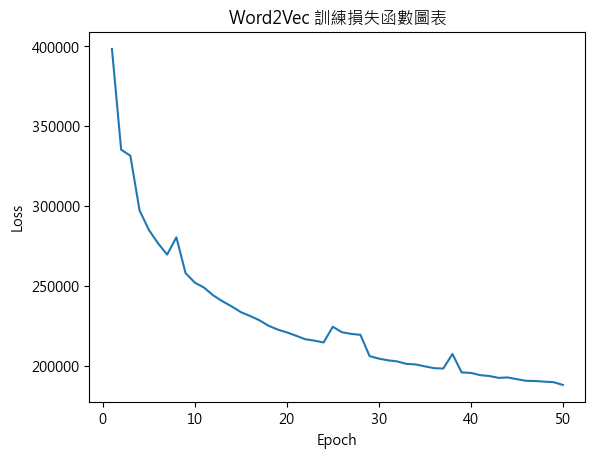

In [31]:
from gensim.models import Word2Vec
import jieba
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

# 讀取文本
documents = []
with open("./cases/bert_finetune/reviews.txt", "r", encoding="utf-8") as file:
    for line in file:
        document = line.split("\t")[0]
        documents.append(document.replace('"', ''))

'''
docs = [
    ['人', '帥'],
    ['人', '帥'],
    ['人', '帥']
]
'''
docs = [jieba.lcut(document) for document in documents]

model = Word2Vec(
    vector_size=100,
    window=5,
    sg=0,
    min_count=1,
    workers=4,
    seed=1234,
    compute_loss=True
)

model.build_vocab(docs)

num_epochs = 50

losses = []

for epoch in range(num_epochs):
    print('=' *50)
    print(f'訓練第 {epoch+1} 個 epoch')
    model.train(
        docs,
        total_examples=model.corpus_count,
        epochs=1,
        compute_loss=True
    )

    loss = model.get_latest_training_loss()

    losses.append(loss)
    print('當前總損失值:', loss)

    model.running_training_loss = 0

plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Word2Vec 訓練損失函數圖表')
plt.show()
